# New Baseline model

Results for NPWD2372:
  Selected Features: ['APSF', 'NPWD2791', 'MPER', 'operations_sum', 'is_nadir']
  Mean Squared Error: 0.0007499274838152362
  Root Mean Squared Error: 0.027384803884914644
  R^2 Score: 0.41464028606883496


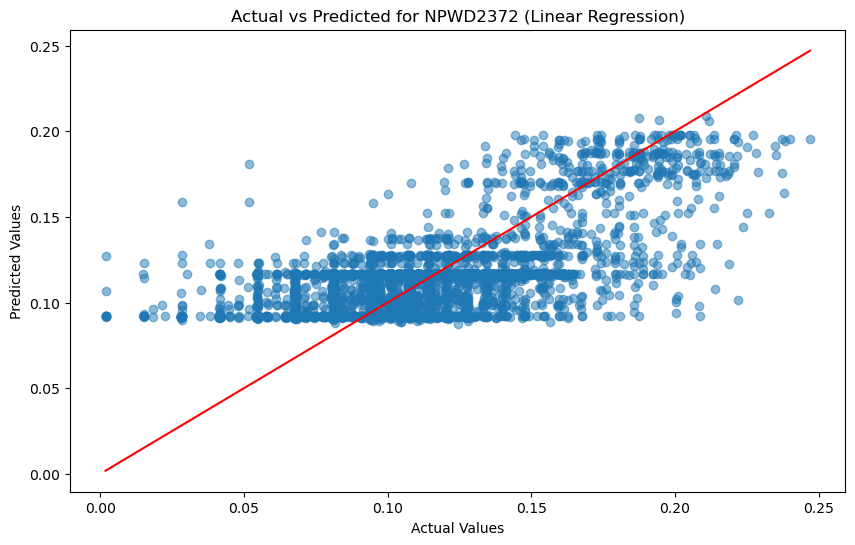

Results for NPWD2401:
  Selected Features: ['NPWD2821', 'NPWD2692', 'NPWD2552', 'NPWD2801', 'NPWD2872']
  Mean Squared Error: 2.717944890148313e-10
  Root Mean Squared Error: 1.6486190858255623e-05
  R^2 Score: 0.6317186784776181


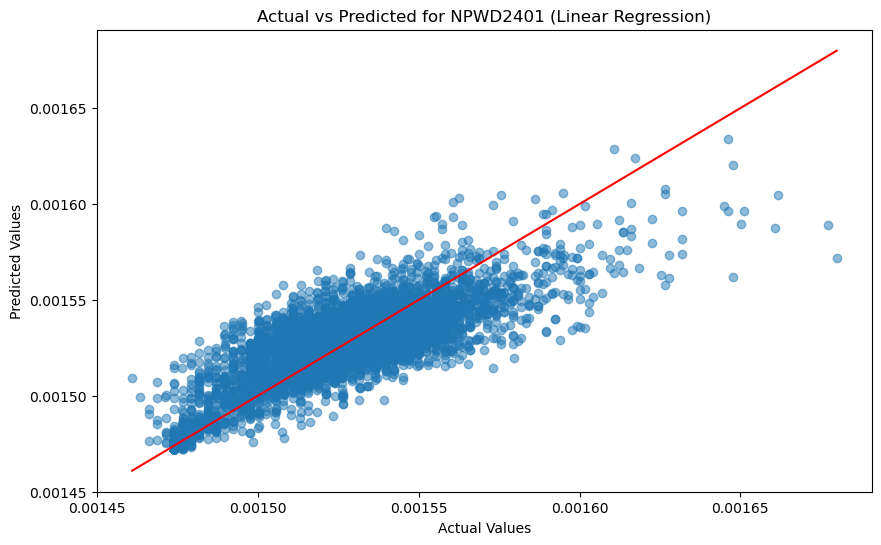

Results for NPWD2402:
  Selected Features: ['NPWD2722', 'NPWD2871', 'NPWD2552', 'NPWD2821', 'NPWD2882']
  Mean Squared Error: 1.50635088491789e-07
  Root Mean Squared Error: 0.00038811736432655135
  R^2 Score: 0.24182688489255666


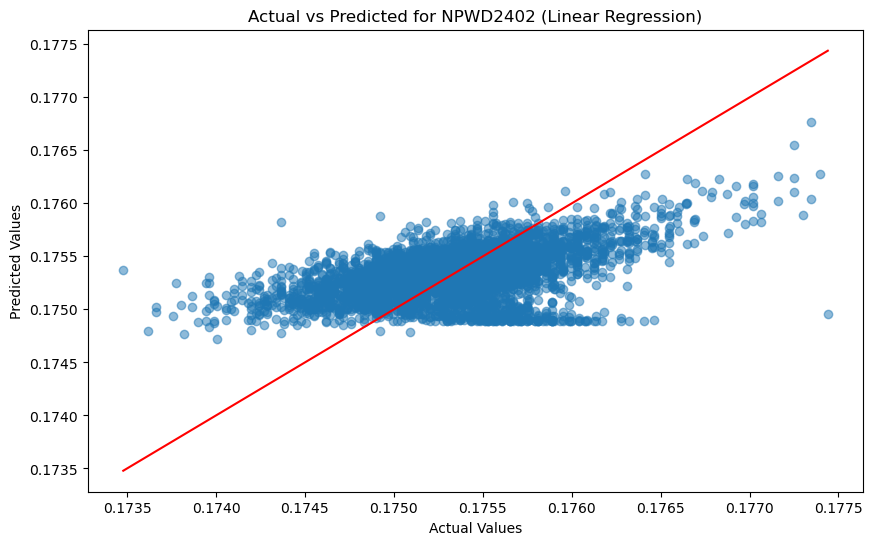

Results for NPWD2451:
  Selected Features: ['NPWD2551', 'NPWD2532', 'NPWD2802', 'NPWD2851', 'NPWD2721']
  Mean Squared Error: 0.06543389558680068
  Root Mean Squared Error: 0.25580049958278167
  R^2 Score: 0.2911010174488914


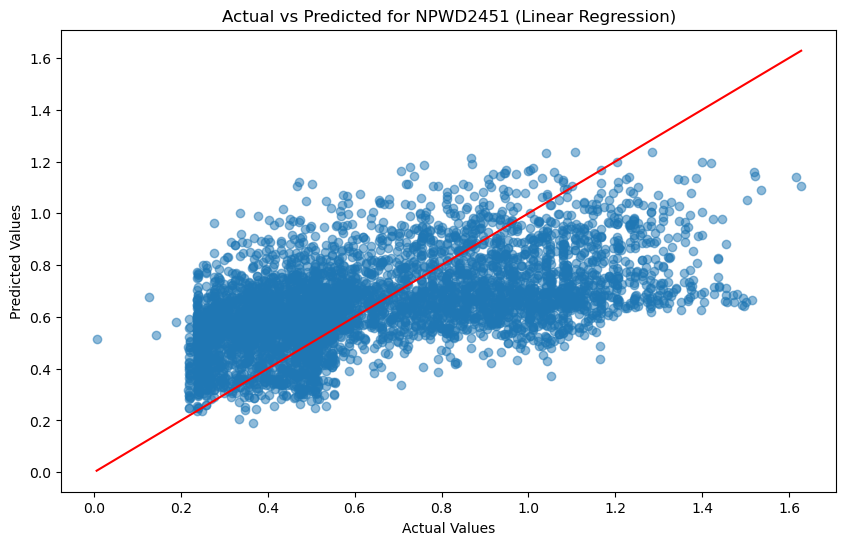

Results for NPWD2471:
  Selected Features: ['NPWD2871', 'NPWD2882', 'NPWD2872', 'NPWD2821', 'NPWD2692']
  Mean Squared Error: 5.74907278511619e-11
  Root Mean Squared Error: 7.582264032013255e-06
  R^2 Score: 0.6798031371628739


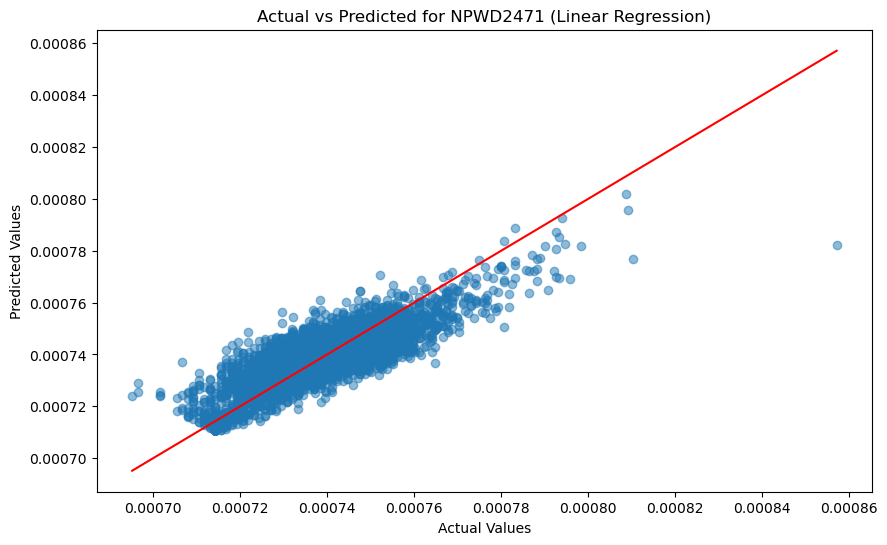

Results for NPWD2472:
  Selected Features: ['NPWD2882', 'NPWD2871', 'NPWD2872', 'NPWD2821', 'NPWD2691']
  Mean Squared Error: 3.439617015152357e-11
  Root Mean Squared Error: 5.864824818485508e-06
  R^2 Score: 0.6868102653885048


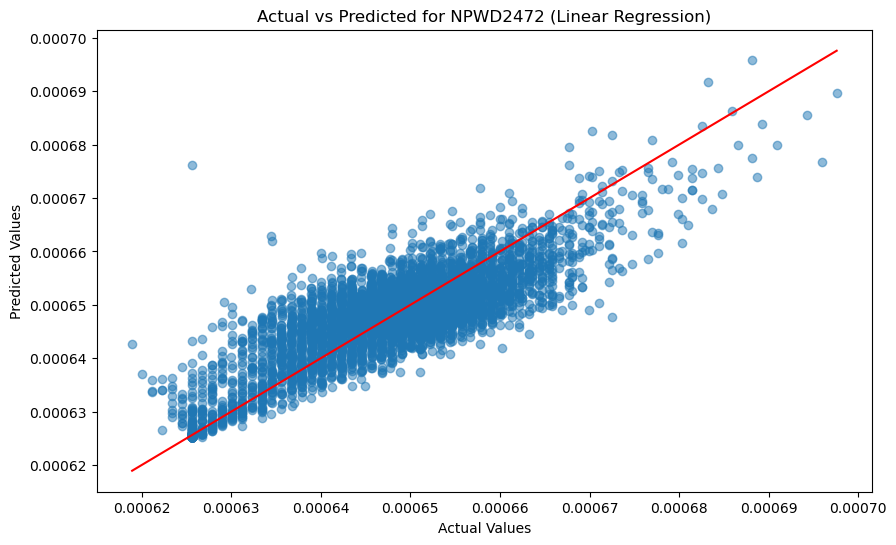

Results for NPWD2481:
  Selected Features: ['AHHH', 'ATTT', 'MPER', 'MOCE', 'sa']
  Mean Squared Error: 0.00011084228362306143
  Root Mean Squared Error: 0.010528166204190616
  R^2 Score: 0.051707941109208844


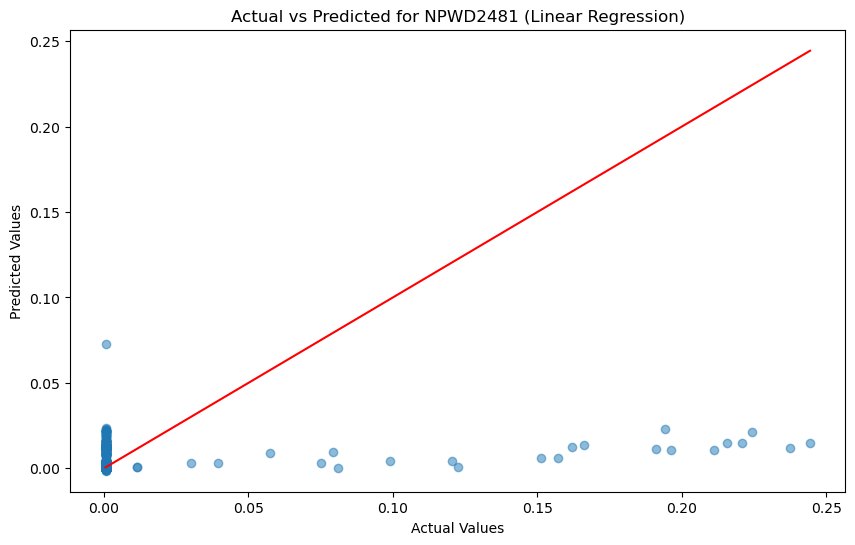

Results for NPWD2482:
  Selected Features: ['NPWD2872', 'NPWD2692', 'NPWD2871', 'NPWD2552', 'NPWD2821']
  Mean Squared Error: 2.766532818602492e-10
  Root Mean Squared Error: 1.663289757860155e-05
  R^2 Score: 0.7190621000214781


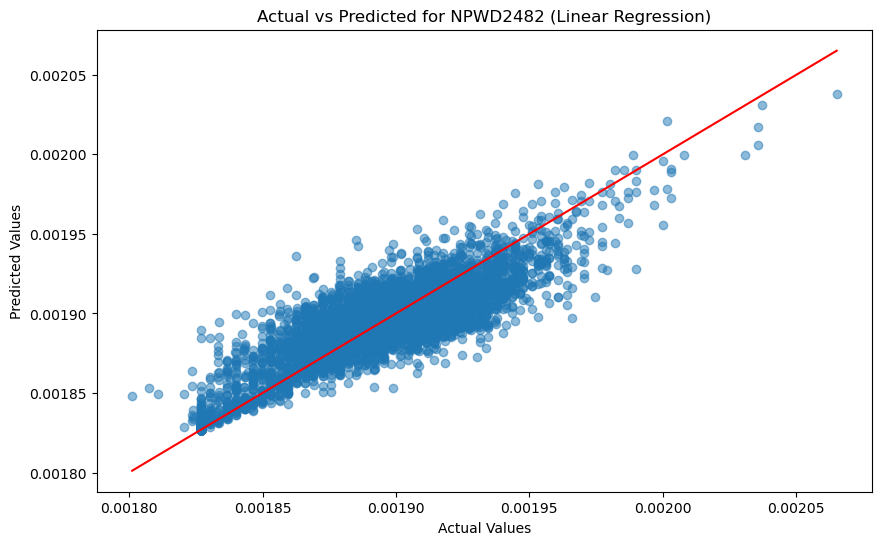

Results for NPWD2491:
  Selected Features: ['NPWD2561', 'NPWD2531', 'NPWD2532', 'NPWD2562', 'NPWD2802']
  Mean Squared Error: 0.0011857282957349281
  Root Mean Squared Error: 0.034434405697426056
  R^2 Score: 0.27943549796599776


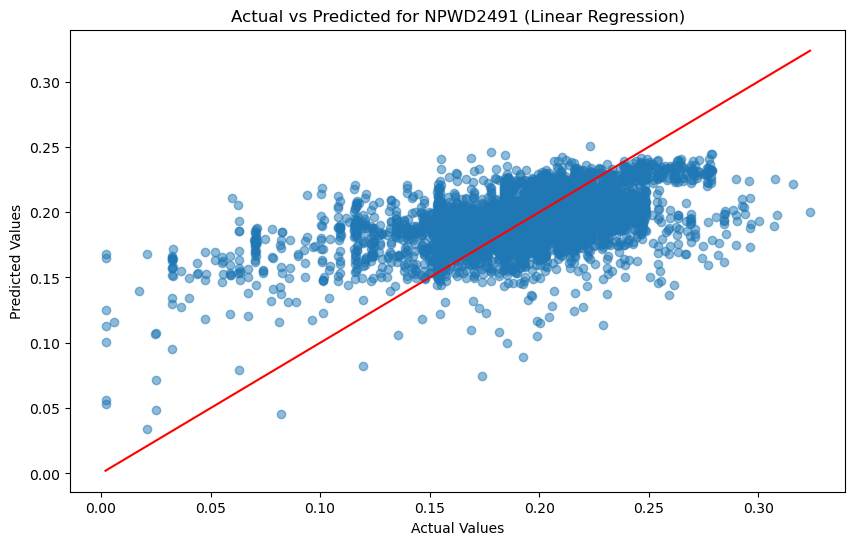

Results for NPWD2501:
  Selected Features: ['NPWD2821', 'NPWD2871', 'NPWD2882', 'NPWD2872', 'NPWD2801']
  Mean Squared Error: 2.2999353162120464e-09
  Root Mean Squared Error: 4.795764085327849e-05
  R^2 Score: 0.675350109954737


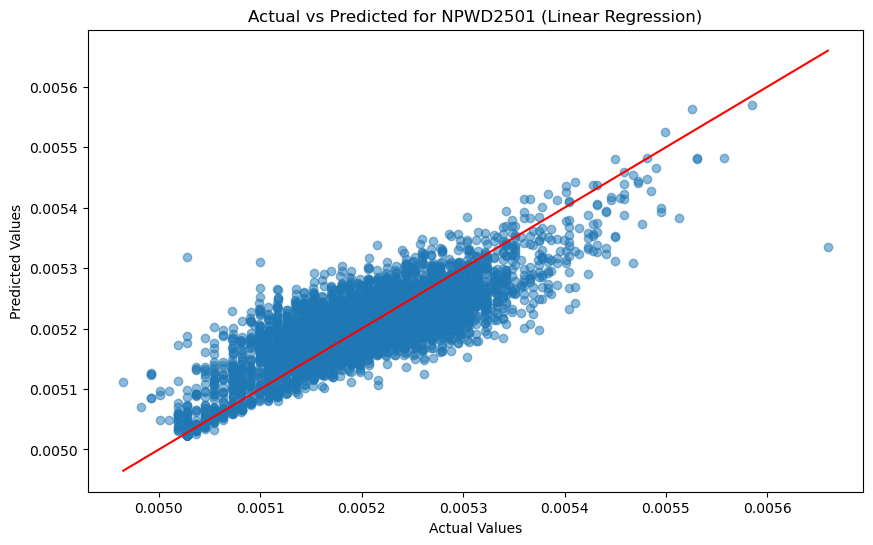

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the merged data
data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Merge the datasets on the 'ut_ms' column
data = pd.merge(data, power_data, on='ut_ms', how='inner')

# Drop unnecessary columns
data = data.drop(columns=['ut_ms', 'Unnamed: 0'], errors='ignore')

# List of thermal power lines to evaluate
thermal_power_lines = [
    'NPWD2372', 'NPWD2401', 'NPWD2402', 'NPWD2451', 'NPWD2471', 
    'NPWD2472', 'NPWD2481', 'NPWD2482', 'NPWD2491', 'NPWD2501'
]

# Ensure we exclude power lines from feature selection
non_power_features = [col for col in data.columns if col not in thermal_power_lines]

# Reevaluate Feature Selection: Calculate correlations again
def reevaluate_features(target_column, data, non_power_features):
    # Calculate correlation of all non-power features with the target power line
    correlation_matrix = data[non_power_features + [target_column]].corr()
    correlations = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)
    
    # Select top 5 correlated features as a starting point
    selected_features = correlations.head(5).index.tolist()
    
    return selected_features

# Define a function to build and evaluate a simple Linear Regression model
def build_baseline_model(power_line, data, non_power_features):
    # Reevaluate features
    features = reevaluate_features(power_line, data, non_power_features)
    
    # Define the target and features
    X = data[features]
    y = data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the LinearRegression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {power_line}:")
    print(f"  Selected Features: {features}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R^2 Score: {r2}")
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'Actual vs Predicted for {power_line} (Linear Regression)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.show()

# Iterate through each thermal power line and build a baseline model
for power_line in thermal_power_lines:
    build_baseline_model(power_line, data, non_power_features)


# Correlation Analysis and Feature Selection per PowerLine

In [2]:
import pandas as pd

# Load the merged satellite data and power data
merged_satellite_df = pd.read_csv('Satellite_File_Merge.csv')
preprocessed_power_df = pd.read_csv('Power_preprocessed.csv')

# Merge the datasets on the 'ut_ms' column
data = pd.merge(merged_satellite_df, preprocessed_power_df, on='ut_ms', how='inner')

# Drop any unnecessary columns, including 'ut_ms' and 'Unnamed: 0' if present
data = data.drop(columns=['ut_ms', 'Unnamed: 0'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = data.corr()

# Identify thermal power lines and satellite features
thermal_power_columns = [col for col in data.columns if 'NPWD' in col]
satellite_features = [col for col in data.columns if col not in thermal_power_columns]

# Dictionary to store selected features for each thermal power line
selected_features = {}

# For each thermal power line, find the top correlated satellite features
for power_line in thermal_power_columns:
    correlations = correlation_matrix[power_line].loc[satellite_features].abs().sort_values(ascending=False)
    top_features = correlations.head(5).index.tolist()  # Select top 5 features based on correlation
    selected_features[power_line] = top_features

# Display the selected features for each thermal power line
for power_line, features in selected_features.items():
    print(f"Selected features for {power_line}: {features}")


Selected features for NPWD2372: ['APSF', 'MPER', 'operations_sum', 'is_nadir', 'ATTT']
Selected features for NPWD2401: ['sx', 'sz', 'is_slew', 'ASSS', 'AXXX']
Selected features for NPWD2402: ['MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS', 'MPER', 'ASSS']
Selected features for NPWD2451: ['MAR_PENUMBRA_END', 'MAR_UMBRA_END', 'is_warmup', 'PENE', 'sz']
Selected features for NPWD2471: ['sz', 'sx', 'is_slew', 'ASSS', 'ATTT']
Selected features for NPWD2472: ['sz', 'sx', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS']
Selected features for NPWD2481: ['AHHH', 'ATTT', 'MPER', 'MOCE', 'sa']
Selected features for NPWD2482: ['sz', 'sx', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS']
Selected features for NPWD2491: ['sx', 'sz', 'is_earth', 'AOOO', 'MOCS']
Selected features for NPWD2501: ['sz', 'AOOO', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'sx']
Selected features for NPWD2531: ['sx', 'sz', 'MAR_UMBRA_END', 'MAR_PENUMBRA_END', 'is_slew']
Selected features for NPWD2532: ['sz', 'sx', 'MPER', 'P

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the satellite data and power data separately
satellite_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Convert 'ut_ms' to datetime in both datasets to ensure alignment
satellite_data['ut_ms'] = pd.to_datetime(satellite_data['ut_ms'])
power_data['ut_ms'] = pd.to_datetime(power_data['ut_ms'])

# List of thermal power lines to evaluate
thermal_power_lines = [
    'NPWD2372', 'NPWD2401', 'NPWD2402', 'NPWD2451', 'NPWD2471', 
    'NPWD2472', 'NPWD2481', 'NPWD2482', 'NPWD2491', 'NPWD2501'
]

# Exclude power lines from the satellite features
satellite_features = [col for col in satellite_data.columns if col not in thermal_power_lines and col != 'ut_ms']

# Reevaluate Feature Selection: Calculate correlations using only satellite features
def reevaluate_features(target_column, satellite_data, power_data):
    # Merge the target power data with the satellite data on 'ut_ms'
    merged_data = pd.merge(satellite_data, power_data[['ut_ms', target_column]], on='ut_ms', how='inner')
    
    # Calculate correlation of all satellite features with the target power line
    correlation_matrix = merged_data[satellite_features + [target_column]].corr()
    correlations = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)
    
    # Select top 5 correlated features as a starting point
    selected_features = correlations.head(5).index.tolist()
    
    return selected_features

# Define a function to build and evaluate a simple Linear Regression model
def build_baseline_model(power_line, satellite_data, power_data):
    # Reevaluate features
    features = reevaluate_features(power_line, satellite_data, power_data)
    
    # Merge the target power data with the selected satellite features on 'ut_ms'
    merged_data = pd.merge(satellite_data[['ut_ms'] + features], power_data[['ut_ms', power_line]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[features]
    y = merged_data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the LinearRegression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {power_line}:")
    print(f"  Selected Features: {features}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R^2 Score: {r2}")
    
    '''# Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'Actual vs Predicted for {power_line} (Linear Regression)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.show()'''

# Iterate through each thermal power line and build a baseline model
for power_line in thermal_power_lines:
    build_baseline_model(power_line, satellite_data, power_data)


Results for NPWD2372:
  Selected Features: ['APSF', 'MPER', 'operations_sum', 'is_nadir', 'ATTT']
  Mean Squared Error: 0.0008821333224186484
  Root Mean Squared Error: 0.02970072932469249
  R^2 Score: 0.3114463459411656
Results for NPWD2401:
  Selected Features: ['AXXX', 'ASEQ', 'MAPO', 'is_radio_science', 'flagcomms']
  Mean Squared Error: 7.364101686392399e-10
  Root Mean Squared Error: 2.7136878387892e-05
  R^2 Score: 0.0021647934363369092
Results for NPWD2402:
  Selected Features: ['MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS', 'AVVV', 'AXXX']
  Mean Squared Error: 1.9864982091575046e-07
  Root Mean Squared Error: 0.0004457014930598174
  R^2 Score: 0.00016022131895276903
Results for NPWD2451:
  Selected Features: ['MAR_PENUMBRA_END', 'MAR_UMBRA_END', 'is_warmup', 'PENE', 'MOCE']
  Mean Squared Error: 0.08763810022151661
  Root Mean Squared Error: 0.2960373291014439
  R^2 Score: 0.05054468295668202
Results for NPWD2471:
  Selected Features: ['PENS', 'AXXX', 'MAR_PENUMBRA_START', 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the satellite data and power data separately
satellite_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Convert 'ut_ms' to datetime in both datasets to ensure alignment
satellite_data['ut_ms'] = pd.to_datetime(satellite_data['ut_ms'])
power_data['ut_ms'] = pd.to_datetime(power_data['ut_ms'])

# List of thermal power lines to evaluate
thermal_power_lines = [
    'NPWD2372', 'NPWD2401', 'NPWD2402', 'NPWD2451', 'NPWD2471', 
    'NPWD2472', 'NPWD2481', 'NPWD2482', 'NPWD2491', 'NPWD2501'
]

# Exclude power lines from the satellite features
satellite_features = [col for col in satellite_data.columns if col not in thermal_power_lines and col != 'ut_ms']

# Function for Recursive Feature Elimination (RFE)
def select_features_rfe(target_column, satellite_data, power_data, n_features_to_select=5):
    # Merge the target power data with the satellite data on 'ut_ms'
    merged_data = pd.merge(satellite_data, power_data[['ut_ms', target_column]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[satellite_features]
    y = merged_data[target_column]
    
    # Initialize a simple Linear Regression model
    model = LinearRegression()
    
    # Use RFE to select the best features
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    
    # Get the selected features
    selected_features = X.columns[rfe.support_].tolist()
    
    return selected_features

# Define a function to build and evaluate a model with the selected features
def build_and_evaluate_model(power_line, satellite_data, power_data, selected_features):
    # Merge the target power data with the selected satellite features on 'ut_ms'
    merged_data = pd.merge(satellite_data[['ut_ms'] + selected_features], power_data[['ut_ms', power_line]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[selected_features]
    y = merged_data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize a Linear Regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {power_line}:")
    print(f"  Selected Features: {selected_features}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R^2 Score: {r2}")

# Iterate through each thermal power line, select features with RFE, and build the model
for power_line in thermal_power_lines:
    selected_features = select_features_rfe(power_line, satellite_data, power_data)
    build_and_evaluate_model(power_line, satellite_data, power_data, selected_features)


Results for NPWD2372:
  Selected Features: ['APWF', 'ATMB', 'ATTT', 'PENE', 'SCMN']
  Mean Squared Error: 0.0011330591661532303
  Root Mean Squared Error: 0.03366094422551498
  R^2 Score: 0.11558490163303947
Results for NPWD2401:
  Selected Features: ['MOCE', 'PPNE', 'PPNS', 'UPBE', 'UPBS']
  Mean Squared Error: 7.379028885257153e-10
  Root Mean Squared Error: 2.7164367994225732e-05
  R^2 Score: 0.0001421591495028851
Results for NPWD2402:
  Selected Features: ['AXXX', 'PENS', 'PPNE', 'PPNS', 'UPBS']
  Mean Squared Error: 1.986937084291469e-07
  Root Mean Squared Error: 0.00044575072454135944
  R^2 Score: -6.0672319304178046e-05
Results for NPWD2451:
  Selected Features: ['PDNE', 'PDNS', 'PENE', 'UPBE', 'UPBS']
  Mean Squared Error: 0.09061943671082245
  Root Mean Squared Error: 0.30103062420760857
  R^2 Score: 0.0182454229942699
Results for NPWD2471:
  Selected Features: ['PDNE', 'PDNS', 'UPBE', 'UPBS', 'OCC_DEIMOS_START']
  Mean Squared Error: 1.797672694775163e-10
  Root Mean Squared

# Advance Model

Mean Squared Error: 0.0004610751308328831
R^2 Score: 0.6401054601812588


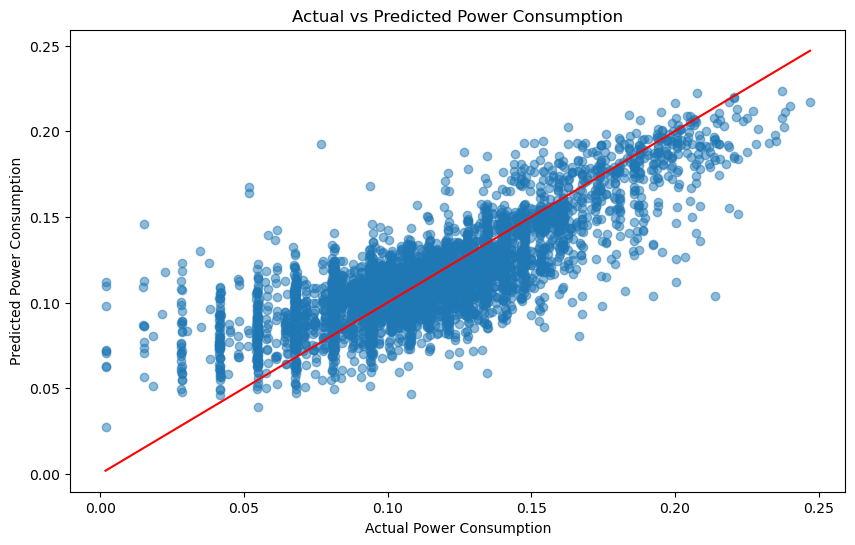

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the merged dataset (ensure this is the file with power data and satellite features)
merged_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Merge the datasets on the 'ut_ms' column
data = pd.merge(merged_data, power_data, on='ut_ms', how='inner')

# Convert the 'ut_ms' to datetime if not already done
data['ut_ms'] = pd.to_datetime(data['ut_ms'])

# Drop any unnecessary columns (e.g., 'Unnamed: 0') and the timestamp for modeling
data = data.drop(columns=['Unnamed: 0', 'ut_ms'])

# Define the target variable (for example, the average of the first power line)
target = data['NPWD2372']

# Define the features (drop all power line columns from features)
features = data.drop(columns=[col for col in data.columns if 'NPWD' in col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Diagonal line
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the merged data
data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Merge the datasets on the 'ut_ms' column
data = pd.merge(data, power_data, on='ut_ms', how='inner')

# Drop unnecessary columns
data = data.drop(columns=['ut_ms', 'Unnamed: 0'], errors='ignore')

# Dictionary of selected features for each thermal power line
selected_features = {
    'NPWD2372': ['APSF', 'MPER', 'operations_sum', 'is_nadir', 'ATTT'],
    'NPWD2401': ['sx', 'sz', 'is_slew', 'ASSS', 'AXXX'],
    'NPWD2402': ['MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS', 'MPER', 'ASSS'],
    'NPWD2451': ['MAR_PENUMBRA_END', 'MAR_UMBRA_END', 'is_warmup', 'PENE', 'sz'],
    'NPWD2471': ['sz', 'sx', 'is_slew', 'ASSS', 'ATTT'],
    'NPWD2472': ['sz', 'sx', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS'],
    'NPWD2481': ['AHHH', 'ATTT', 'MPER', 'MOCE', 'sa'],
    'NPWD2482': ['sz', 'sx', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'PENS'],
    'NPWD2491': ['sx', 'sz', 'is_earth', 'AOOO', 'MOCS'],
    'NPWD2501': ['sz', 'AOOO', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START', 'sx'],
    'NPWD2531': ['sx', 'sz', 'MAR_UMBRA_END', 'MAR_PENUMBRA_END', 'is_slew'],
    'NPWD2532': ['sz', 'sx', 'MPER', 'PENE', 'MOCE'],
    'NPWD2551': ['MAR_PENUMBRA_END', 'MAR_UMBRA_END', 'PENE', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START'],
    'NPWD2552': ['sz', 'sx', 'PENS', 'MAR_PENUMBRA_START', 'MAR_UMBRA_START'],
    'NPWD2561': ['AOOO', 'sx', 'sa', 'sz', 'is_across_track'],
    'NPWD2562': ['AHHH', 'ATTT', 'sa', 'is_across_track', 'AOOO'],
    'NPWD2691': ['sz', 'sx', 'MOCE', 'is_slew', 'MAR_PENUMBRA_START'],
    'NPWD2692': ['sz', 'sx', 'MOCE', 'ASSS', 'MOCS'],
    'NPWD2721': ['sz', 'sx', 'MPER', 'PENE', 'MOCE'],
    'NPWD2722': ['MAR_UMBRA_START', 'MAR_PENUMBRA_START', 'PENS', 'MAR_PENUMBRA_END', 'MAR_UMBRA_END'],
    'NPWD2742': ['sx', 'sz', 'operations_sum', 'AAAA', 'sa'],
    'NPWD2771': ['PENE', 'MAR_UMBRA_END', 'MAR_PENUMBRA_START', 'MAR_PENUMBRA_END', 'MAR_UMBRA_START'],
    'NPWD2791': ['MAPO', 'MPER', 'sa', 'is_slew', 'MOCE'],
    'NPWD2792': ['sz', 'sx', 'is_slew', 'ATTT', 'AXXX'],
    'NPWD2801': ['sx', 'sz', 'is_slew', 'ATTT', 'MOCE'],
    'NPWD2802': ['sz', 'sx', 'PENE', 'MPER', 'MAR_PENUMBRA_END'],
    'NPWD2821': ['sx', 'sz', 'is_slew', 'ASSS', 'ATTT'],
    'NPWD2851': ['MAR_UMBRA_END', 'MAR_PENUMBRA_END', 'PENE', 'MOCE', 'sa'],
    'NPWD2852': ['is_slew', 'MAPO', 'MOCE', 'flagcomms', 'operations_sum'],
    'NPWD2871': ['is_slew', 'sx', 'MOCE', 'ATTT', 'ASSS'],
    'NPWD2872': ['sx', 'sz', 'is_slew', 'ASSS', 'MOCE'],
    'NPWD2881': ['AOOO', 'MPER', 'sa', 'MAPO', 'is_slew'],
    'NPWD2882': ['sx', 'sz', 'is_slew', 'MOCE', 'ASSS'],
}

# Function to build and evaluate a model for each thermal power line
def build_and_evaluate_model(power_line, features):
    # Define the target and features
    X = data[features]
    y = data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Results for {power_line}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R^2 Score: {r2}")
    print("")

# Iterate through each thermal power line and build a model
for power_line, features in selected_features.items():
    build_and_evaluate_model(power_line, features)


Results for NPWD2372:
  Mean Squared Error: 0.0008388649740438133
  Root Mean Squared Error: 0.028963165815287066
  R^2 Score: 0.3452196754611271

Results for NPWD2401:
  Mean Squared Error: 8.791273562857707e-10
  Root Mean Squared Error: 2.965008189340749e-05
  R^2 Score: -0.1912168849815581

Results for NPWD2402:
  Mean Squared Error: 1.9918560810317187e-07
  Root Mean Squared Error: 0.00044630214888926077
  R^2 Score: -0.0025364906157574474

Results for NPWD2451:
  Mean Squared Error: 0.11238840566737517
  Root Mean Squared Error: 0.3352438003414458
  R^2 Score: -0.21759564692973798

Results for NPWD2471:
  Mean Squared Error: 2.0948200727656958e-10
  Root Mean Squared Error: 1.447349326446693e-05
  R^2 Score: -0.16671825280128183

Results for NPWD2472:
  Mean Squared Error: 1.3330482940784038e-10
  Root Mean Squared Error: 1.154577106164159e-05
  R^2 Score: -0.21378932482176016

Results for NPWD2481:
  Mean Squared Error: 0.00010492234257392152
  Root Mean Squared Error: 0.0102431

# Checking for top feature per powerline

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the satellite data and power data separately
satellite_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Convert 'ut_ms' to datetime in both datasets to ensure alignment
satellite_data['ut_ms'] = pd.to_datetime(satellite_data['ut_ms'])
power_data['ut_ms'] = pd.to_datetime(power_data['ut_ms'])

# Automatically identify all thermal power lines from the power data
thermal_power_lines = [col for col in power_data.columns if col != 'ut_ms']

# Exclude power lines from the satellite features
satellite_features = [col for col in satellite_data.columns if col not in thermal_power_lines and col != 'ut_ms']

# Function to build and evaluate a Random Forest model
def build_random_forest_model(power_line, satellite_data, power_data, n_estimators=100):
    # Merge the target power data with the satellite data on 'ut_ms'
    merged_data = pd.merge(satellite_data, power_data[['ut_ms', power_line]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[satellite_features]
    y = merged_data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    # Feature importance
    feature_importances = model.feature_importances_
    important_features = pd.Series(feature_importances, index=satellite_features).sort_values(ascending=False)
    
    print(f"Results for {power_line}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R^2 Score: {r2}")
    print(f"  Top 5 Important Features: {important_features.head(5)}")
    
    '''# Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'Actual vs Predicted for {power_line} (Random Forest)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.show()'''

# Iterate through each thermal power line and build a Random Forest model
for power_line in thermal_power_lines:
    build_random_forest_model(power_line, satellite_data, power_data)


Results for NPWD2372:
  Mean Squared Error: 0.00038525138965066354
  Root Mean Squared Error: 0.019627821826444816
  R^2 Score: 0.6992900672339453
  Top 5 Important Features: APSF          0.319688
Unnamed: 0    0.277285
sa            0.063891
sz            0.050043
sy            0.050024
dtype: float64
Results for NPWD2401:
  Mean Squared Error: 7.316114144916832e-10
  Root Mean Squared Error: 2.7048316296799013e-05
  R^2 Score: 0.008667101579261538
  Top 5 Important Features: Unnamed: 0    0.215838
sz            0.111291
sx            0.111029
sa            0.091454
sy            0.089162
dtype: float64
Results for NPWD2402:
  Mean Squared Error: 2.1446519611736132e-07
  Root Mean Squared Error: 0.00046310387184449376
  R^2 Score: -0.07944136688505932
  Top 5 Important Features: Unnamed: 0    0.172792
sz            0.118530
sx            0.115360
sy            0.097438
sa            0.096588
dtype: float64
Results for NPWD2451:
  Mean Squared Error: 0.046813361189293135
  Root Mean S

Results for NPWD2851:
  Mean Squared Error: 0.005714259503395692
  Root Mean Squared Error: 0.07559272123290503
  R^2 Score: 0.7669721443212748
  Top 5 Important Features: Unnamed: 0    0.505321
sz            0.153415
sa            0.106911
sy            0.030501
sx            0.025034
dtype: float64
Results for NPWD2852:
  Mean Squared Error: 8.588502544568682e-09
  Root Mean Squared Error: 9.267417409704109e-05
  R^2 Score: -0.2730058907514772
  Top 5 Important Features: operations_sum    0.159629
Unnamed: 0        0.127956
sx                0.118001
sz                0.108004
LOS               0.100912
dtype: float64
Results for NPWD2871:
  Mean Squared Error: 1.0479903328252791e-10
  Root Mean Squared Error: 1.0237139897575295e-05
  R^2 Score: 0.008988848131700755
  Top 5 Important Features: Unnamed: 0    0.224685
sz            0.106248
sx            0.102959
sa            0.089199
sy            0.088137
dtype: float64
Results for NPWD2872:
  Mean Squared Error: 1.6191456532201819e

# Checking for overall model rmse

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the satellite data and power data separately
satellite_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Convert 'ut_ms' to datetime in both datasets to ensure alignment
satellite_data['ut_ms'] = pd.to_datetime(satellite_data['ut_ms'])
power_data['ut_ms'] = pd.to_datetime(power_data['ut_ms'])

# Automatically identify all thermal power lines from the power data
thermal_power_lines = [col for col in power_data.columns if col != 'ut_ms']

# Exclude irrelevant features from the satellite data (e.g., Unnamed: 0)
relevant_satellite_features = [col for col in satellite_data.columns if col not in thermal_power_lines and col != 'ut_ms' and col != 'Unnamed: 0']

# Function to select top correlated features
def select_top_correlated_features(target_column, satellite_data, power_data, n_features_to_select=5):
    # Merge the target power data with the satellite data on 'ut_ms'
    merged_data = pd.merge(satellite_data, power_data[['ut_ms', target_column]], on='ut_ms', how='inner')
    
    # Calculate correlation with the target column
    correlation_matrix = merged_data.corr()
    correlations = correlation_matrix[target_column].abs().sort_values(ascending=False)
    
    # Select the top correlated features excluding the target itself
    selected_features = correlations.index[1:n_features_to_select + 1].tolist()
    
    return selected_features

# Function to build and evaluate a Random Forest model
def build_and_evaluate_model(power_line, satellite_data, power_data, selected_features, n_estimators=100):
    # Merge the target power data with the selected satellite features on 'ut_ms'
    merged_data = pd.merge(satellite_data[['ut_ms'] + selected_features], power_data[['ut_ms', power_line]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[selected_features]
    y = merged_data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2

# Overall scores storage
overall_rmse = []
overall_r2 = []

# Iterate through each thermal power line, select features, and build the model
for power_line in thermal_power_lines:
    selected_features = select_top_correlated_features(power_line, satellite_data, power_data, n_features_to_select=5)
    rmse, r2 = build_and_evaluate_model(power_line, satellite_data, power_data, selected_features)
    overall_rmse.append(rmse)
    overall_r2.append(r2)

# Calculate overall scores
average_rmse = np.mean(overall_rmse)
average_r2 = np.mean(overall_r2)

print("\nOverall Model Performance:")
print(f"  Average RMSE: {average_rmse}")
print(f"  Average R^2 Score: {average_r2}")


C:\Users\Pooja\AppData\Local\Temp\ipykernel_18404\738700922.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()
C:\Users\Pooja\AppData\Local\Temp\ipykernel_18404\738700922.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()
C:\Users\Pooja\AppData\Local\Temp\ipykernel_18404\738700922.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()
C:\Users\Pooja\AppData

C:\Users\Pooja\AppData\Local\Temp\ipykernel_18404\738700922.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()
C:\Users\Pooja\AppData\Local\Temp\ipykernel_18404\738700922.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()
C:\Users\Pooja\AppData\Local\Temp\ipykernel_18404\738700922.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()
C:\Users\Pooja\AppData


Overall Model Performance:
  Average RMSE: 0.04957200836072711
  Average R^2 Score: 0.11017552278018063


#  Ensembled model (ExtraTrees and XGBoost)

In [19]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the satellite data and power data separately
satellite_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Convert 'ut_ms' to datetime in both datasets to ensure alignment
satellite_data['ut_ms'] = pd.to_datetime(satellite_data['ut_ms'])
power_data['ut_ms'] = pd.to_datetime(power_data['ut_ms'])

# Automatically identify all thermal power lines from the power data
thermal_power_lines = [col for col in power_data.columns if col != 'ut_ms']

# Exclude irrelevant features from the satellite data (e.g., Unnamed: 0)
relevant_satellite_features = [col for col in satellite_data.columns if col not in thermal_power_lines and col != 'ut_ms' and col != 'Unnamed: 0']

# Function to identify top features using Extra Trees
def identify_top_features(target_column, satellite_data, power_data, n_features=40):
    # Merge the target power data with the satellite data on 'ut_ms'
    merged_data = pd.merge(satellite_data, power_data[['ut_ms', target_column]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[relevant_satellite_features]
    y = merged_data[target_column]
    
    # Train Extra Trees Regressor to identify top features
    model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Get feature importances
    importances = model.feature_importances_
    feature_indices = np.argsort(importances)[-n_features:]  # Select top n features
    
    # Return the names of the top features
    top_features = X.columns[feature_indices].tolist()
    return top_features

# Function to train and evaluate models
def train_and_evaluate_models(power_line, satellite_data, power_data, selected_features):
    # Merge the target power data with the selected satellite features on 'ut_ms'
    merged_data = pd.merge(satellite_data[['ut_ms'] + selected_features], power_data[['ut_ms', power_line]], on='ut_ms', how='inner')
    
    # Define the target and features
    X = merged_data[selected_features]
    y = merged_data[power_line]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize models
    models = {
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'RMSE': rmse,
            'R^2': r2
        }
    
    return results

# Iterate through each thermal power line, identify top features, and train models
overall_results = {}

for power_line in thermal_power_lines:
    # Step 1: Identify top 40 features using Extra Trees
    top_features = identify_top_features(power_line, satellite_data, power_data, n_features=40)
    
    # Step 2: Train and evaluate models using the top features
    results = train_and_evaluate_models(power_line, satellite_data, power_data, top_features)
    
    # Store results for each power line
    overall_results[power_line] = results
    print(f"Results for {power_line}:")
    for model_name, metrics in results.items():
        print(f"  {model_name} - RMSE: {metrics['RMSE']}, R^2: {metrics['R^2']}")

# Optionally, aggregate results to get an overall performance summary
avg_rmse_xgboost = np.mean([results['XGBoost']['RMSE'] for results in overall_results.values()])
avg_r2_xgboost = np.mean([results['XGBoost']['R^2'] for results in overall_results.values()])

avg_rmse_extra_trees = np.mean([results['Extra Trees']['RMSE'] for results in overall_results.values()])
avg_r2_extra_trees = np.mean([results['Extra Trees']['R^2'] for results in overall_results.values()])

print("\nOverall Model Performance Summary:")
print(f"XGBoost - Average RMSE: {avg_rmse_xgboost}, Average R^2: {avg_r2_xgboost}")
print(f"Extra Trees - Average RMSE: {avg_rmse_extra_trees}, Average R^2: {avg_r2_extra_trees}")


Results for NPWD2372:
  XGBoost - RMSE: 0.0218683929574577, R^2: 0.6267177854092632
  Extra Trees - RMSE: 0.02206961869840776, R^2: 0.6198165396299364
Results for NPWD2401:
  XGBoost - RMSE: 2.7169691702389004e-05, R^2: -0.00024978613337967026
  Extra Trees - RMSE: 2.9342351719550086e-05, R^2: -0.16661856532146246
Results for NPWD2402:
  XGBoost - RMSE: 0.0004457384512789713, R^2: -5.601907147934071e-06
  Extra Trees - RMSE: 0.0004973224467118415, R^2: -0.24485382058833371
Results for NPWD2451:
  XGBoost - RMSE: 0.2351861038667312, R^2: 0.40075434806610777
  Extra Trees - RMSE: 0.24586862825704986, R^2: 0.34508066400118453
Results for NPWD2471:
  XGBoost - RMSE: 1.3405205944510304e-05, R^2: -0.0008436693342299684
  Extra Trees - RMSE: 1.4633642953386153e-05, R^2: -0.19268065319292904
Results for NPWD2472:
  XGBoost - RMSE: 1.0480315859424517e-05, R^2: -0.00010632444076486003
  Extra Trees - RMSE: 1.1135701073596526e-05, R^2: -0.12910039310695498
Results for NPWD2481:
  XGBoost - RMSE: 

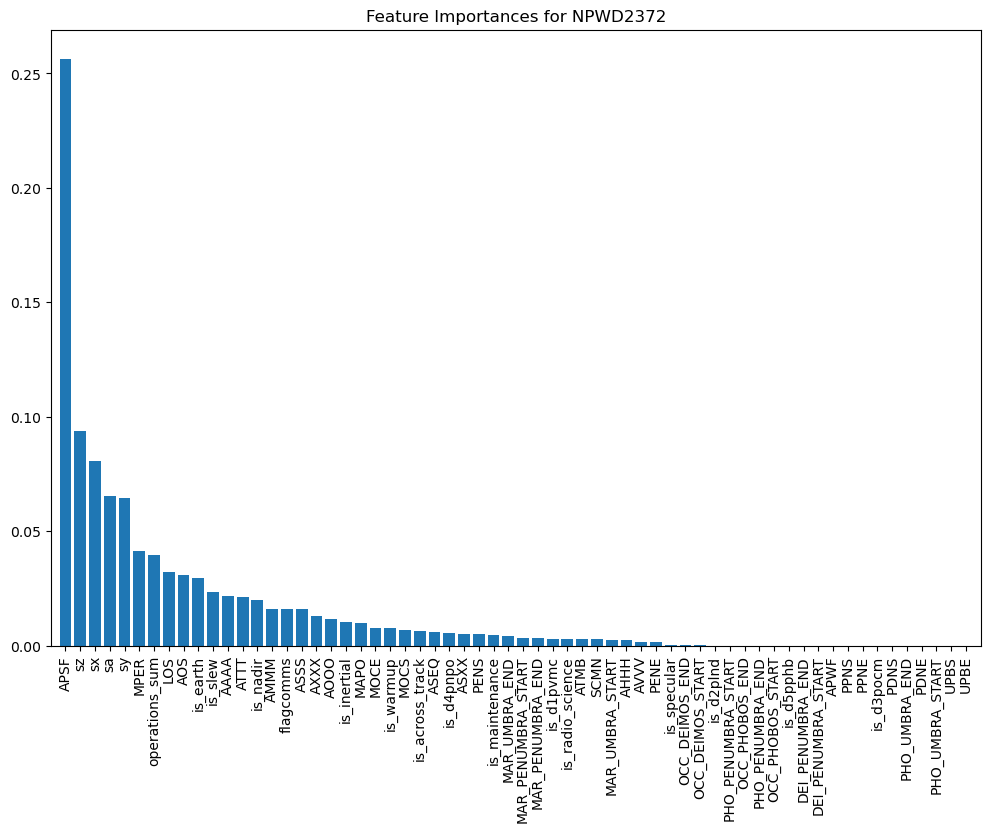

Top 40 features selected for NPWD2372:
['APSF', 'sz', 'sx', 'sa', 'sy', 'MPER', 'operations_sum', 'LOS', 'AOS', 'is_earth', 'is_slew', 'AAAA', 'ATTT', 'is_nadir', 'AMMM', 'flagcomms', 'ASSS', 'AXXX', 'AOOO', 'is_inertial', 'MAPO', 'MOCE', 'is_warmup', 'MOCS', 'is_across_track', 'ASEQ', 'is_d4pnpo', 'ASXX', 'PENS', 'is_maintenance', 'MAR_UMBRA_END', 'MAR_PENUMBRA_START', 'MAR_PENUMBRA_END', 'is_d1pvmc', 'is_radio_science', 'ATMB', 'SCMN', 'MAR_UMBRA_START', 'AHHH', 'AVVV']


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

# Load the satellite data and power data separately
satellite_data = pd.read_csv('Satellite_File_Merge.csv')
power_data = pd.read_csv('Power_preprocessed.csv')

# Convert 'ut_ms' to datetime in both datasets to ensure alignment
satellite_data['ut_ms'] = pd.to_datetime(satellite_data['ut_ms'])
power_data['ut_ms'] = pd.to_datetime(power_data['ut_ms'])

# Select a specific power line for visualization (e.g., NPWD2372)
power_line = 'NPWD2372'

# Exclude irrelevant features from the satellite data (e.g., Unnamed: 0)
relevant_satellite_features = [col for col in satellite_data.columns if col not in power_data.columns and col != 'ut_ms' and col != 'Unnamed: 0']

# Merge the target power data with the satellite data on 'ut_ms'
merged_data = pd.merge(satellite_data, power_data[['ut_ms', power_line]], on='ut_ms', how='inner')

# Define the target and features
X = merged_data[relevant_satellite_features]
y = merged_data[power_line]

# Train Extra Trees Regressor to identify top features
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title(f"Feature Importances for {power_line}")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Select the top 40 features
top_n = 40
top_features = [X.columns[i] for i in indices[:top_n]]

print(f"Top {top_n} features selected for {power_line}:")
print(top_features)
